In [7]:
#!pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
from tensorflow.keras import regularizers

In [40]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

,shipped_count
ship_date_weekly,
2017-01-01,168.0
2017-01-01,1476.0
2017-01-01,360.0
2017-02-01,240.0
2017-03-01,720.0
2017-03-01,0.0
2017-03-01,3036.0
2017-03-01,5592.0
2017-03-01,4548.0


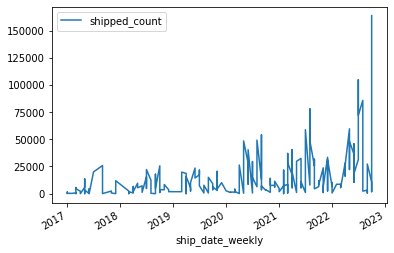

In [35]:
df_woodstream_p1=pd.read_excel('/content/Updated_forecasting_values.xlsx', sheet_name = "T300B_new_monthly")
df_woodstream_p1['ship_date_weekly']=pd.to_datetime(df_woodstream_p1['ship_date_weekly'])
df_wdstrm_p1new = df_woodstream_p1.set_index('ship_date_weekly')
# df_wdstrm_p1new = df_wdstrm_p1new.groupby("ship_date_weekly").sum()
df_wdstrm_p1new.plot(kind = 'line')
df_wdstrm_p1new.head(30)

In [10]:
df_wdstrm_p1new.tail(20)

,shipped_count
ship_date_weekly,
2022-06-01,33960.0
2022-06-01,45768.0
2022-06-01,18408.0
2022-07-01,31320.0
2022-07-01,104760.0
2022-07-01,48960.0
2022-07-01,72120.0
2022-08-01,85800.0
2022-08-01,5400.0


In [11]:
df_woodstream_p1=pd.read_excel('/content/Updated_forecasting_values.xlsx', sheet_name = "T300B_new_monthly")
df_woodstream_p1['ship_date_weekly']=pd.to_datetime(df_woodstream_p1['ship_date_weekly'])

In [12]:
df_woodstream_p1=df_woodstream_p1[:191]

In [13]:
df_woodstream_p1

,ship_date_weekly,shipped_count
0,2017-01-01,168.0
1,2017-01-01,1476.0
2,2017-01-01,360.0
3,2017-02-01,240.0
4,2017-03-01,720.0
...,...,...
186,2021-11-01,6480.0
187,2021-12-01,33480.0
188,2021-12-01,6720.0
189,2021-12-01,2400.0


In [14]:
df_wdstrm_p1new = df_woodstream_p1.set_index('ship_date_weekly')
df_wdstrm_p1new = df_wdstrm_p1new.groupby("ship_date_weekly").sum()

In [15]:
df_wdstrm_p1new

,shipped_count
ship_date_weekly,
2017-01-01,2004.0
2017-02-01,240.0
2017-03-01,13896.0
2017-04-01,2256.0
2017-05-01,22740.0
2017-06-01,5196.0
2017-07-01,19992.0
2017-09-01,25896.0
2017-11-01,5400.0


In [49]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# data_smoothen = SimpleExpSmoothing(df_wdstrm_p1new['shipped_count'], initialization_method="estimated").fit()
# #data_smoothen = ExponentialSmoothing(df_wdstrm_p1new['shipped_count'], initialization_method="estimated").fit()
# data_smoothen=data_smoothen.fittedvalues.to_frame(name = 'ship')
# data_smoothen.plot(kind = 'line')
# data_smoothen.info()
# data_smoothen

In [50]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# data_smoothen = SimpleExpSmoothing(df_wdstrm_p1new['shipped_count'], initialization_method="estimated").fit()
# #data_smoothen = ExponentialSmoothing(df_wdstrm_p1new['shipped_count'], initialization_method="estimated").fit()
# data_smoothen=data_smoothen.fittedvalues.to_frame(name = 'ship')
# data_smoothen.plot(kind = 'line')
# data_smoothen.info()
# data_smoothen

In [16]:
time  = pd.Series(df_wdstrm_p1new.index)
series_1 = df_wdstrm_p1new['shipped_count'].values 
per_age = 1
shp = series_1.shape
shp_i = per_age*shp[0]
shp_i = math.floor(shp_i) 
time_valid = time.loc[shp_i + 1:]
print(shp[0])
time

55


0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
5    2017-06-01
6    2017-07-01
7    2017-09-01
8    2017-11-01
9    2017-12-01
10   2018-03-01
11   2018-04-01
12   2018-05-01
13   2018-06-01
14   2018-07-01
15   2018-08-01
16   2018-09-01
17   2018-10-01
18   2018-11-01
19   2018-12-01
20   2019-02-01
21   2019-03-01
22   2019-04-01
23   2019-05-01
24   2019-06-01
25   2019-07-01
26   2019-08-01
27   2019-09-01
28   2019-10-01
29   2019-11-01
30   2019-12-01
31   2020-01-01
32   2020-02-01
33   2020-03-01
34   2020-04-01
35   2020-05-01
36   2020-06-01
37   2020-07-01
38   2020-08-01
39   2020-09-01
40   2020-10-01
41   2020-11-01
42   2020-12-01
43   2021-01-01
44   2021-02-01
45   2021-03-01
46   2021-04-01
47   2021-05-01
48   2021-06-01
49   2021-07-01
50   2021-08-01
51   2021-09-01
52   2021-10-01
53   2021-11-01
54   2021-12-01
Name: ship_date_weekly, dtype: datetime64[ns]

In [17]:
x_train = series_1[:shp_i]
x_valid = series_1[shp_i+1:]

print(x_train)


[  2004.    240.  13896.   2256.  22740.   5196.  19992.  25896.   5400.
  11916.   4200.  12180.  15000.  23076.  42600.  22800.  22512.  38304.
  20400.   5400.   1800.  43200.  44400.  25836.  98760.  46200.  16392.
  28200.  23244.  27696.  10116.   5304.   4668.   8796.  42156.  57228.
 108648.  45036.  66960.  84600.   6600.  22800.  25080.   9600.  36000.
  84396.  82920.  60480.  64320. 100080. 170040.  94560.  33000.  36720.
  74280.]


In [18]:
window_size = 15
batch_size = 8
shuffle_buffer_size = 1
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.SimpleRNN(80, return_sequences=True,activation = 'relu'),  
#  tf.keras.layers.SimpleRNN(80, return_sequences=True,kernel_regularizer=regularizers.L2(l2 = 0.1)),
#  tf.keras.layers.SimpleRNN(80, return_sequences=True,kernel_regularizer=regularizers.L2(l2 = 0.1)),  
#  tf.keras.layers.SimpleRNN(80,return_sequences=True,kernel_regularizer=regularizers.L2(l2 = 0.1)),
     
    tf.keras.layers.SimpleRNN(80,return_sequences=True,activation ='relu'),
    
#  tf.keras.layers.SimpleRNN(80,return_sequences=True),  
    tf.keras.layers.SimpleRNN(80,activation ='relu'),
    tf.keras.layers.Dense(1),
#    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 15, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 15, 80)            6560      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 80)            12880     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 80)                12880     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 32,401
Trainable params: 32,401
Non-trainable params: 0
_________________________________________________________________


In [55]:
# ep_var = 1000
# pre_multplier = 1e-6
# divisor = 200
# lr_max = pre_multplier * 10**(ep_var / divisor)
# lr_min = pre_multplier * 10**(0 / divisor)
# lr_max,lr_min

In [56]:
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: pre_multplier * 10**(epoch / divisor))

In [20]:
model.compile(loss="mape", optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

In [21]:
model.fit(dataset, epochs=500)

Epoch 1/500
5/5 [==============================] - 3s 83ms/step - loss: 83.6040
Epoch 2/500
5/5 [==============================] - 0s 12ms/step - loss: 94.0341
Epoch 3/500
5/5 [==============================] - 0s 14ms/step - loss: 69.9043
Epoch 4/500
5/5 [==============================] - 0s 14ms/step - loss: 73.7786
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 58.6200
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 57.1581
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 55.7053
Epoch 8/500
5/5 [==============================] - 0s 12ms/step - loss: 50.4672
Epoch 9/500
5/5 [==============================] - 0s 11ms/step - loss: 45.4689
Epoch 10/500
5/5 [==============================] - 0s 12ms/step - loss: 45.5849
Epoch 11/500
5/5 [==============================] - 0s 12ms/step - loss: 37.5402
Epoch 12/500
5/5 [==============================] - 0s 15ms/step - loss: 41.0659
Epoch 13/500
5/5 [===================

In [59]:
# lrs = pre_multplier * (10 ** (np.arange(ep_var) / divisor))

# # Set the figurenumpy  size
# plt.figure(figsize=(10, 6))

# # Set the grid
# plt.grid(True)

# # Plot the loss in log scale
# plt.semilogx(lrs, history.history["loss"])

# # Increase the tickmarks size
# plt.tick_params('both', length=10, width=1, which='both')

# # Set the plot boundaries
# plt.axis([1e-3, 0.01, 0, 200])


In [22]:
forecast = []

# Use the model to predict data points per window size
#model.predict(series[]
for i in range(len(series_1) - window_size):
  forecast.append(model.predict(series_1[i:i + window_size][np.newaxis]))
  #print(i,model.predict(series[i:i + window_size][np.newaxis]))
len(forecast)
# Slice the points that are aligned with the validation set
#forecast = forecast[shp_i+1 - window_size:]

# Compare number of elements in the predictions and the validation set
#print(f'length of the forecast list: {len(forecast)}')
#print(f'shape of the validation set: {x_valid.shape}')
print(forecast)

1/1 [==============================] - 0s 19ms/step
[array([[22879.074]], dtype=float32), array([[21361.963]], dtype=float32), array([[37344.074]], dtype=float32), array([[19482.06]], dtype=float32), array([[5508.0664]], dtype=float32), array([[2283.5596]], dtype=float32), array([[41213.94]], dtype=float32), array([[45619.2]], dtype=float32), array([[24753.752]], dtype=float32), array([[96518.055]], dtype=float32), array([[46388.58]], dtype=float32), array([[15825.834]], dtype=float32), array([[28745.152]], dtype=float32), array([[23009.096]], dtype=float32), array([[28415.48]], dtype=float32), array([[10795.35]], dtype=float32), array([[5249.466]], dtype=float32), array([[4953.7495]], dtype=float32), array([[7795.13]], dtype=float32), array([[40567.547]], dtype=float32), array([[55570.37]], dtype=float32), array([[104141.98]], dtype=float32), array([[46202.004]], dtype=float32), array([[64566.3]], dtype=float32), array([[83024.51]], dtype=float32), array([[7062.6973]], dtype=float32),

In [23]:
i = shp[0] -window_size
print(model.predict(series_1[i:i + window_size][np.newaxis]))


1/1 [==============================] - 0s 19ms/step
[[107966.67]]


In [24]:
# print(np.sum(forecast[-12:]))
# print(forecast[-12:])
# plt.plot((tf.reshape(forecast,shape=(45))))
# plt.plot(series_1[window_size:])

# results = np.array(forecast).squeeze()
# print(len(results))
# print(results.sum(),x_valid.sum())
# # plt.subplot(211)
# plt.plot(time_valid,results,color = 'r')
# # plt.subplot(212)
# plt.plot(time_valid,x_valid)


In [25]:
i=shp[0] -window_size
for k in range(12):
    forecast_future = []
    for m in range(1):

        forecast_future.append(model.predict(series_1[i:i + window_size][np.newaxis]))
    i+=1
    new_value = forecast_future[-1]
    #model.predict(series[i:i + window_size][np.newaxis])
    print(new_value)
    series_1 = list(series_1)
    series_1.append(float(new_value))
    dataset_1 = windowed_dataset(series_1, window_size, batch_size, shuffle_buffer_size)
    if k%3==0:
      model.fit(dataset_1,epochs=500)
    print("len of series :",len(series_1))
    series_1 = np.array(series_1)

1/1 [==============================] - 0s 20ms/step
[[107966.67]]
Epoch 1/500
6/6 [==============================] - 0s 16ms/step - loss: 4.3099
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 5.3204
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 5.9239
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 4.3021
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 8.0035
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 4.9842
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 7.0820
Epoch 8/500
6/6 [==============================] - 0s 14ms/step - loss: 4.4359
Epoch 9/500
6/6 [==============================] - 0s 13ms/step - loss: 5.6446
Epoch 10/500
6/6 [==============================] - 0s 12ms/step - loss: 5.2282
Epoch 11/500
6/6 [==============================] - 0s 13ms/step - loss: 6.5889
Epoch 12/500
6/6 [==============================] - 0s 12ms/ste

In [26]:
np.sum(series_1[-12:])

459726.75537109375

In [27]:
(series_1[-12:])

array([107966.671875  ,  58354.609375  ,  77065.2734375 ,  36587.27734375,
        29147.43554688,  44577.7421875 ,  20560.84570312,   8162.24853516,
         4691.43359375,  27938.95703125,  28652.890625  ,  16021.37011719])

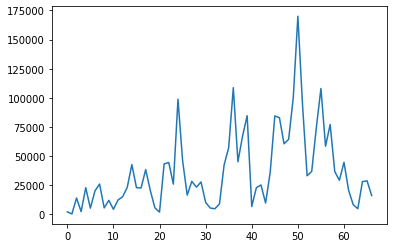

In [28]:
plt.plot(series_1)

In [29]:
series_1[-12:]

array([107966.671875  ,  58354.609375  ,  77065.2734375 ,  36587.27734375,
        29147.43554688,  44577.7421875 ,  20560.84570312,   8162.24853516,
         4691.43359375,  27938.95703125,  28652.890625  ,  16021.37011719])

In [30]:
df_woodstream_p1=pd.read_excel('/content/Updated_forecasting_values.xlsx', sheet_name = "T300B_new_monthly")
df_woodstream_p1['ship_date_weekly']=pd.to_datetime(df_woodstream_p1['ship_date_weekly'])
df_wdstrm_p1new = df_woodstream_p1.set_index('ship_date_weekly')
df_wdstrm_p1new = df_wdstrm_p1new.groupby("ship_date_weekly").sum()

In [31]:
df_wdstrm_p1new[-10:]

,shipped_count
ship_date_weekly,
2022-01-01,19080.0
2022-02-01,8640.0
2022-03-01,14040.0
2022-04-01,95280.0
2022-05-01,158604.0
2022-06-01,144936.0
2022-07-01,257160.0
2022-08-01,110040.0
2022-09-01,49560.0


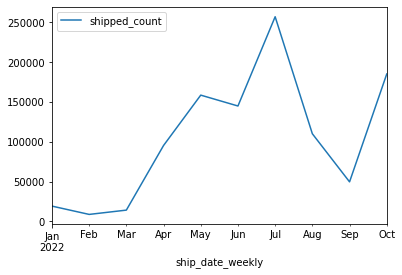

In [32]:
df_wdstrm_p1new[-10:].plot()


In [33]:
df=pd.DataFrame()
df['actual']=df_wdstrm_p1new[-10:]
df['predict']=series_1[-10:]

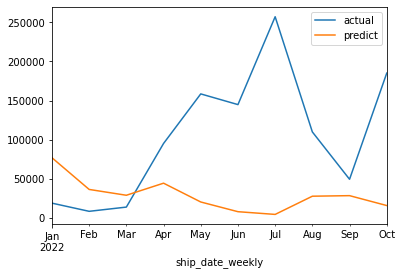

In [34]:
df.plot()